In [1]:
from Arbie.Actions.amm import Amm
from Arbie import Token

In [2]:
size = 100

# Setup tokens
dai = Token('dai')
eth = Token('eth')

pool1 = Amm([dai, eth],[400*size, 1*size],[0.51, 0.49], fee=0.003)
print(pool1.spot_price(dai, eth))
pool1

384.3137254901961


Amm(
    Tokens: [Token(Name: dai, Address: None), Token(Name: eth, Address: None)],
    Balances: [Variable(Token: Token(Name: dai, Address: None), Value: 40000), Variable(Token: Token(Name: eth, Address: None), Value: 100)],
    Weights: [Variable(Token: Token(Name: dai, Address: None), Value: 0.51), Variable(Token: Token(Name: eth, Address: None), Value: 0.49)],
    Fee: 0.003)

In [3]:
pool2 = Amm([dai, eth],[410*size, 1*size],[0.51, 0.49], fee=0.005)
print(pool2.spot_price(dai, eth))
pool2

393.92156862745094


Amm(
    Tokens: [Token(Name: dai, Address: None), Token(Name: eth, Address: None)],
    Balances: [Variable(Token: Token(Name: dai, Address: None), Value: 41000), Variable(Token: Token(Name: eth, Address: None), Value: 100)],
    Weights: [Variable(Token: Token(Name: dai, Address: None), Value: 0.51), Variable(Token: Token(Name: eth, Address: None), Value: 0.49)],
    Fee: 0.005)

In [4]:
# We can see that pool2 has a higher price for eth then pool1. If we have dai we can buy eth from pool1 and sell to pool2
# The only question is how much should we buy and sell?

In [5]:
from sympy import *
from sympy.plotting import plot
init_printing()

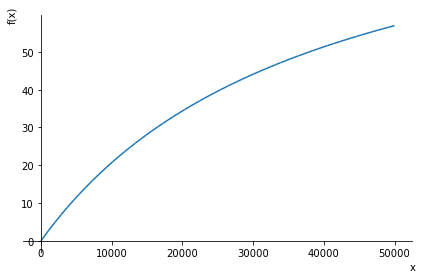

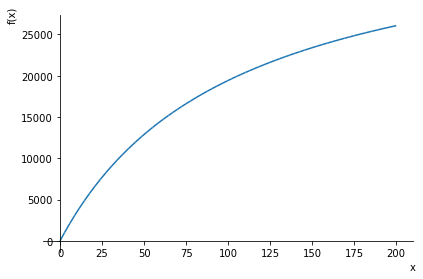

In [6]:
# We can plot our return function
x = symbols('x')
expr = pool1.out_given_in_expr(dai, eth)
plot(expr, (x, 0, 50000))
expr = pool1.out_given_in_expr(eth, dai)
plot(expr, (x, 0, 200))

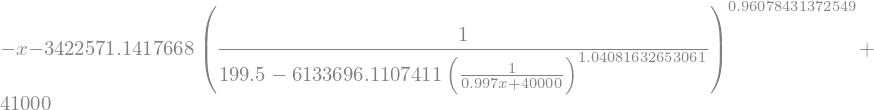

In [7]:
# How can we found if there is an arbitrage opertunity between pool1 and pool2?
from Arbie.Actions.arbitrage import arbitrage_expr, arbitrage_diff_expr, TradeOpertunity

trade = TradeOpertunity([pool1, pool2], dai, eth)
arb_expr = arbitrage_expr(trade)
arb_expr

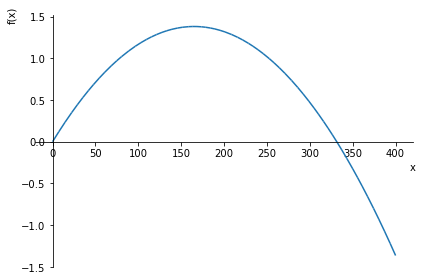

In [8]:
# If we plot we can clearly see that there seams to be some profit to be made!
plot(arb_expr, (x, 0, 400))

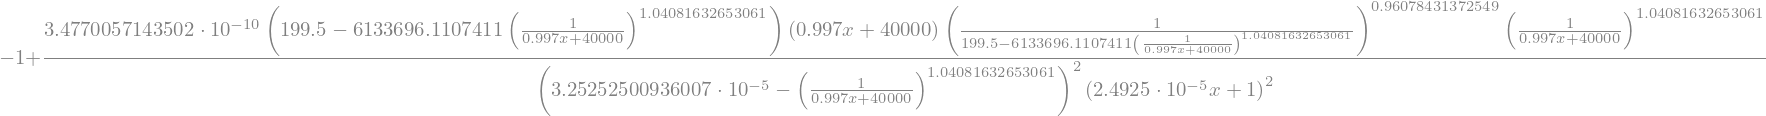

In [9]:
darb_expr = arbitrage_diff_expr(trade)
darb_expr

In [10]:
from Arbie.Actions.arbitrage import find_arbitrage
find_arbitrage(trade)

Variable(Token: Token(Name: dai, Address: None), Value: 165.009948076539)

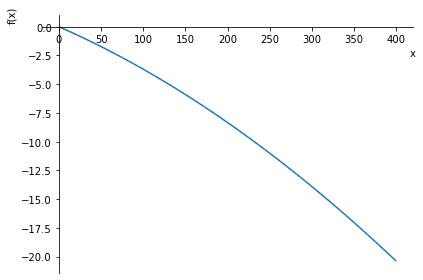

In [11]:
# If we have two pools that dosn't have an arbitrage opertunity what happens then?
bad_trade = TradeOpertunity([pool2, pool1], dai, eth)
bad_expr = arbitrage_expr(bad_trade)
plot(bad_expr, (x, 0, 400))